# Proyek Analisis Data: [Bike sharing dataset]
- **Nama:** Rizal Gibran Aldrin Pratama
- **Email:** gibran.aldrin.p@gmail.com
- **ID Dicoding:** ergeape

## Menentukan Pertanyaan Bisnis

1. siapakah yang lebih sering menggunakan layanan?, apakah yang sering jauh lebih dominan?
2. bagaimana pola peminjaman sepeda berdasarkan musim dan cuaca?
3. bagaimana tren peminjaman per bulan?
4. bagaimana perbandingan antara hari libur dan hari biasa terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

## Data Wrangling

### Gathering Data

In [2]:
days_df = pd.read_csv("Bike-sharing-dataset/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hours_df = pd.read_csv("Bike-sharing-dataset/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tabel day memiliki 16 kolom, tabel hour memiliki 17 kolom
- Nama kolom dari kedua tabel sama, kecuali pada hour terdapat 1 tambahan kolom hr

### Assessing Data

In [4]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Berdasarkan tabel days_df dan hours_df, terdapat keanehan tipe data untuk kolom dteday, yang seharusnya bertipe data datetime bukan object

In [6]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada duplikat data pada kedua tabel tersebut

In [8]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat keanehan pada data

### Cleaning Data

In [10]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

In [11]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

In [13]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [14]:
# mengubah nilai data

days_df["mnth"] = days_df["mnth"].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}).astype("category")

days_df["season"] = days_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}).astype("category")

days_df["weekday"] = days_df["weekday"].map({
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",4: "Thursday", 5: "Friday", 6: "Saturday"
}).astype("category")

days_df["weathersit"] = days_df["weathersit"].map({
    1: "Clear", 2: "Misty/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"
}).astype("category")

days_df["yr"] = days_df["yr"].map({
    0: "2011", 1: "2012"
}).astype("category")

days_df["workingday"] = days_df["workingday"].map({
    0: "Holiday", 1: "Workingday"
}).astype("category")

# Cek perubahan tipe data
print(days_df.dtypes)
days_df.head()

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday                int64
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Workingday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Workingday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Workingday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
# mengubah nilai data

hours_df["mnth"] = hours_df["mnth"].map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}).astype("category")

hours_df["season"] = hours_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}).astype("category")

hours_df["weekday"] = hours_df["weekday"].map({
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",4: "Thursday", 5: "Friday", 6: "Saturday"
}).astype("category")

hours_df["weathersit"] = hours_df["weathersit"].map({
    1: "Clear", 2: "Misty/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"
}).astype("category")

hours_df["yr"] = hours_df["yr"].map({
    0: "2011", 1: "2012"
}).astype("category")

hours_df["workingday"] = hours_df["workingday"].map({
    0: "Holiday", 1: "Workingday"
}).astype("category")

# Cek perubahan tipe data
print(hours_df.dtypes)
hours_df.head()

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                     int64
holiday                int64
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tipe data kolom dteday sudah berubah yang semula object menjadi datetime
- Melakukan perubahan tipe data integer menjadi keterangan pada kolom month, season, weekday, wheatersit, year, workingday agar tidak membingungkan untuk diproses lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore pengguna layanan yang dominan

In [16]:
# Hitung total penggunaan layanan oleh masing-masing kategori user
total_casual = days_df["casual"].sum()
total_registered = days_df["registered"].sum()

print(f"Total penggunaan oleh Casual Users: {total_casual}")
print(f"Total penggunaan oleh Registered Users: {total_registered}")

if total_registered > total_casual:
    print("Registered users lebih sering menggunakan layanan.")
else:
    print("Casual users lebih sering menggunakan layanan.")

Total penggunaan oleh Casual Users: 620017
Total penggunaan oleh Registered Users: 2672662
Registered users lebih sering menggunakan layanan.


In [17]:
# Hitung total penggunaan layanan oleh masing-masing kategori user
total_casual = hours_df["casual"].sum()
total_registered = hours_df["registered"].sum()

print(f"Total penggunaan oleh Casual Users: {total_casual}")
print(f"Total penggunaan oleh Registered Users: {total_registered}")

if total_registered > total_casual:
    print("Registered users lebih sering menggunakan layanan.")
else:
    print("Casual users lebih sering menggunakan layanan.")


Total penggunaan oleh Casual Users: 620017
Total penggunaan oleh Registered Users: 2672662
Registered users lebih sering menggunakan layanan.


**Insight:**
- Pengguna registered lebih dominan 4 kali lipat lebih daripada pengguna kasual

### Explore pola penyewaan berdasarkan season dan weather

In [18]:
days_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min", "max", "mean", "sum"]
})

casual registered   cnt                            
           sum        sum   min   max         mean      sum
season                                                     
Fall    226091     835038  1115  8714  5644.303191  1061129
Spring   60622     410726   431  7836  2604.132597   471348
Summer  203522     715067   795  8362  4992.331522   918589
Winter  129782     711831    22  8555  4728.162921   841613

In [19]:
days_df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min", "max", "mean", "sum"]
})

casual registered  cnt                            
                    sum        sum  min   max         mean      sum
weathersit                                                         
Clear            446346    1811606  431  8714  4876.786177  2257952
Light Rain/Snow    3895      33974   22  4639  1803.285714    37869
Misty/Cloudy     169776     827082  605  8362  4035.862348   996858

**Insight:**
- Penyewaan sepeda berdasarkan season jumlah terbanyak terjadi pada fall sesaon, jumlah tersedikit terjadi pada spring season
- Penyewaan sepeda berdasarkan weather, jumlah terbanyak terjasi pada clear weather dan tidak ada peminjaman pada heavey rain/snow weather

### Explore jumlah peminjam dalam 2 tahun terakhir

In [20]:
days_df.groupby("yr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min", "max", "mean", "std", "sum"]
})

casual registered  cnt                                         
         sum        sum  min   max         mean          std      sum
yr                                                                   
2011  247252     995851  431  6043  3405.761644  1378.753666  1243103
2012  372765    1676811   22  8714  5599.934426  1788.667868  2049576

**Insight:**
- Dari hasil diatas tren penyewaan sepeda terjadi pada tahun 2012 dari tahun 2011
- Jumlah penyewa sepeda pada tahun 2012 mengalami peningkatan sebanyak 1,6 kali dibandingkan pada tahun 2011

In [21]:
days_df['mnth'] = pd.Categorical(days_df['mnth'], categories=['Jan','Feb','Mar','Apr','May','Jun',
                                                             'Jul','Aug','Sep','Oct','Nov','Dec'],ordered=True)
monthly_trend = days_df.groupby(["yr", "mnth"])["cnt"].sum().reset_index()
pivot_table = monthly_trend.pivot(index="mnth", columns="yr", values="cnt")
print(pivot_table)

yr      2011    2012
mnth                
Jan    38189   96744
Feb    48215  103137
Mar    64045  164875
Apr    94870  174224
May   135821  195865
Jun   143512  202830
Jul   141341  203607
Aug   136691  214503
Sep   127418  218573
Oct   123511  198841
Nov   102167  152664
Dec    87323  123713


**Insight:**
- Dari hasil diatas menapilkan jumlah penyewa untuk masing-masing bulan pada tahun 2011 dan 2012

In [22]:
# Kelompokkan data berdasarkan tahun dan bulan, lalu jumlahkan jumlah peminjaman
monthly_trend = days_df.groupby(["yr", "mnth"])["cnt"].sum().reset_index()

# Mencari bulan dengan peminjaman terbanyak dan tersedikit untuk setiap tahun
max_month_per_year = monthly_trend.loc[monthly_trend.groupby("yr")["cnt"].idxmax()]
min_month_per_year = monthly_trend.loc[monthly_trend.groupby("yr")["cnt"].idxmin()]

print("Bulan dengan peminjaman terbanyak per tahun:")
print(max_month_per_year)

print("\nBulan dengan peminjaman tersedikit per tahun:")
print(min_month_per_year)


Bulan dengan peminjaman terbanyak per tahun:
      yr mnth     cnt
5   2011  Jun  143512
20  2012  Sep  218573

Bulan dengan peminjaman tersedikit per tahun:
      yr mnth    cnt
0   2011  Jan  38189
12  2012  Jan  96744


**Insight:**
- Dari hasil diatas menampilkan jumlah penyewa terbanyak bulan Juni untuk tahun 2011 dan bulan September untuk tahun 2012
- Jumlah penyewa tersedikit terjadi pada bulan Januari baik di tahun 2011 maupun tahun 2012

### Explore perbandingan penyewa sepeda pada harian, weekday dan holiday

In [23]:
days_df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min", "max", "mean", "sum"]
}).reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

casual registered   cnt                           
              sum        sum   min   max         mean     sum
weekday                                                      
Sunday     140521     303506   605  8227  4228.828571  444027
Monday      70784     384719    22  7525  4338.123810  455503
Tuesday     57843     411266   683  7767  4510.663462  469109
Wednesday   57319     415729   441  8173  4548.538462  473048
Thursday    61460     423935   431  7804  4667.259615  485395
Friday      78238     409552  1167  8362  4690.288462  487790
Saturday   153852     323955   627  8714  4550.542857  477807

In [24]:
day_trend = days_df.groupby("weekday")["cnt"].sum().reset_index()
max_day = day_trend.loc[day_trend["cnt"].idxmax()]
min_day = day_trend.loc[day_trend["cnt"].idxmin()]

print(f"Hari dengan peminjaman terbanyak: {max_day['weekday']} ({max_day['cnt']} peminjaman)")
print(f"Hari dengan peminjaman tersedikit: {min_day['weekday']} ({min_day['cnt']} peminjaman)")


Hari dengan peminjaman terbanyak: Friday (487790 peminjaman)
Hari dengan peminjaman tersedikit: Sunday (444027 peminjaman)


**Insight:**
- Dari hasil diatas tren penyewaan sepeda terjadi pada tahun 2012 dari tahun 2011

In [25]:
days_df.groupby("workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min", "max", "mean", "std", "sum"]
})

casual registered  cnt                                         
               sum        sum  min   max         mean          std      sum
workingday                                                                 
Holiday     316732     683537  605  8714  4330.168831  2052.141245  1000269
Workingday  303285    1989125   22  8362  4584.820000  1878.415583  2292410

**Insight:**
- Kode program diatas menghitung dan menghasilkan jumlah penyewa sepeda pengguna registered dan kasual berdasarkan hari libur dan hari kerja, serta menampilkan jumlah pengguna keduanya berdasarkan hari libur dan hari kerja
- Hasil tersebut menampilkan total pengguna (registered dan casual) paling banyak pada hari kerja.

In [26]:
holiday_rentals = days_df.groupby("holiday")["cnt"].sum()

print(holiday_rentals)

holiday
0    3214244
1      78435
Name: cnt, dtype: int64


**Insight:**
- Kode tersebut menghitung total penyewaan sepeda berdasarkan status hari libur
- Hasil yang ditunjukkan memiliki dua nilai : holiday = 1 untuk hari libur dan holiday = 0 untuk hari kerja biasa, yang jumlahnya lebih banyak hari kerja biasa dibandimgkan hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: siapakah yang lebih sering menggunakan layanan?

C:\Users\TUF Gaming\AppData\Local\Temp\ipykernel_1576\2496861066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=users, y=counts, palette="coolwarm")


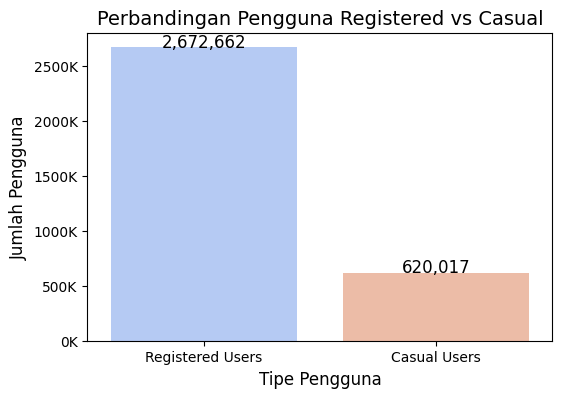

In [27]:
total_registered = days_df["registered"].sum()
total_casual = days_df["casual"].sum()

users = ["Registered Users", "Casual Users"]
counts = [total_registered, total_casual]

plt.figure(figsize=(6, 4))
sns.barplot(x=users, y=counts, palette="coolwarm")

# Menambahkan angka di atas bar dalam format ribuan (1K, 10K, dll.)
for i, count in enumerate(counts):
    plt.text(i, count + 1000, f"{count:,}", ha='center', fontsize=12)

# Format angka di sumbu Y menjadi ribuan
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.title("Perbandingan Pengguna Registered vs Casual", fontsize=14)
plt.ylabel("Jumlah Pengguna", fontsize=12)
plt.xlabel("Tipe Pengguna", fontsize=12)
plt.show()


**Insight:**
- Berdasarkan gambar di atas, diketahui bahwa kebanyakan penyewa sepeda adalah registered users yang lebih dominan dibandingkan casual users.

### Pertanyaan 2: bagaimana pola peminjaman sepeda berdasarkan musim dan cuaca

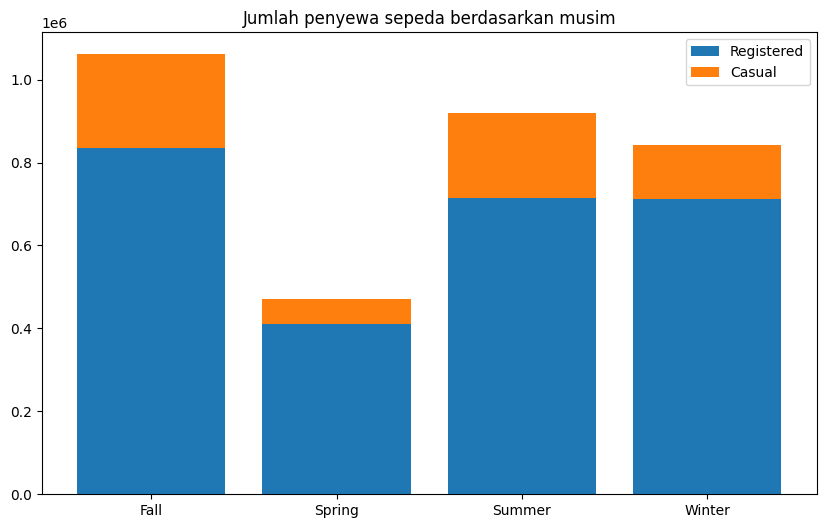

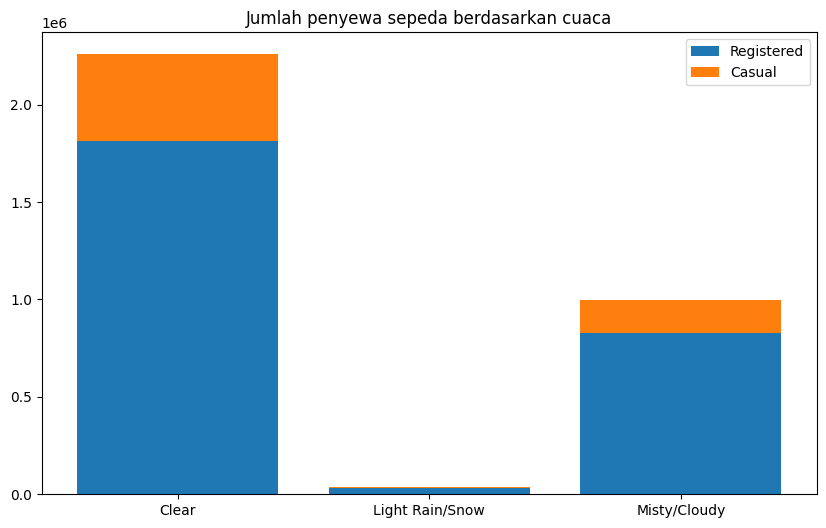

In [28]:
season_pattern = days_df.groupby('season')[['registered', 'casual']].sum().reset_index()
weather_pattern = days_df.groupby('weathersit')[['registered', 'casual']].sum().reset_index()

musim = ['spring', 'summer', 'fall', 'winter']
cuaca = ['Clear', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Ice']

plt.figure(figsize=(10, 6))
plt.bar(season_pattern['season'], season_pattern['registered'], label='Registered', color='tab:blue')
plt.bar(season_pattern['season'], season_pattern['casual'], label='Casual', color='tab:orange', bottom=season_pattern['registered'])
plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewa sepeda berdasarkan musim')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(weather_pattern['weathersit'], weather_pattern['registered'], label='Registered', color='tab:blue')
plt.bar(weather_pattern['weathersit'], weather_pattern['casual'], label='Casual', color='tab:orange', bottom=weather_pattern['registered'])
plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewa sepeda berdasarkan cuaca')
plt.legend()
plt.show()

**Insight:**
- berdasarkan gambar di atas jumlah penyewa sepeda paling banyak terjadi pada fall season
- untuk berdasarkan cuaca, jumlah penyewa terbanyak terjadi pada clear weather

### Pertanyaan 3: bagaimana tren peminjaman sepeda per bulan?

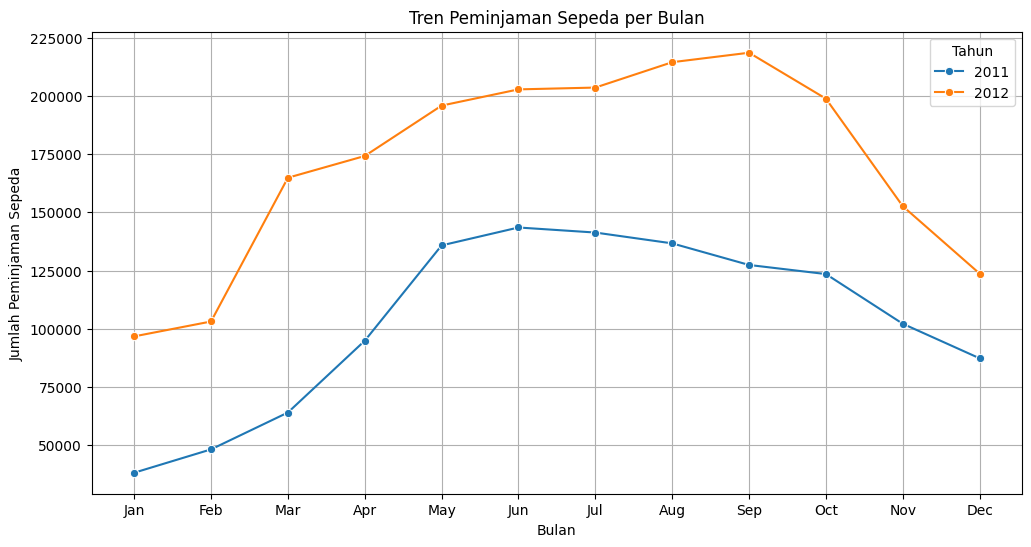

In [29]:
monthly_trend = days_df.groupby(["yr", "mnth"])["cnt"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x="mnth", y="cnt", hue="yr", marker="o")

plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda per Bulan")
plt.legend(title="Tahun")
plt.grid(True)
plt.show()

**Insight:**
- Jumlah penyewa terjadi kenaikan pada tahun 2012 dibandingkan tahun 2011.
- Pada tahun 2011, dari bulan Januari hingga Juni mengalami kenaikan dan terjadi penurunan memasuki bulan Juli
- Pada tahun 2012, dari awal tahun mengalami kenaikkan jumlah penyewa hingga bulan September yang merupakan puncaknya jumlah penyewa, memasuki bulan Oktober mengalami penurunan.

### Pertanyaan 4: bagaimana perbandingan antara hari libur dan hari biasa terhadap jumlah penyewaan sepeda

C:\Users\TUF Gaming\AppData\Local\Temp\ipykernel_1576\1958082193.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="workingday", y="cnt", data=workingday_trend, palette="Blues")


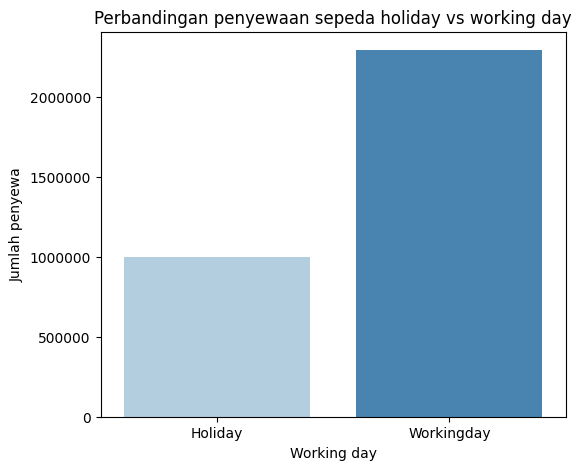

In [30]:
workingday_trend = days_df.groupby("workingday")["cnt"].sum().reset_index()

plt.figure(figsize=(6, 5))
ax = sns.barplot(x="workingday", y="cnt", data=workingday_trend, palette="Blues")

# Atur format sumbu Y menjadi ribuan tanpa desimal
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:.0f}"))

plt.xlabel("Working day")
plt.ylabel("Jumlah penyewa")
plt.title("Perbandingan penyewaan sepeda holiday vs working day")
plt.show()

**Insight:**
- Working day adalah suatu kondisi dimana jumlah penyewa sepeda lebih banyak hingga dua kali lipat lebih dibandingkan pada holiday.

In [31]:
days_df.to_csv("dataa_df.csv", index=False)

## Binning

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

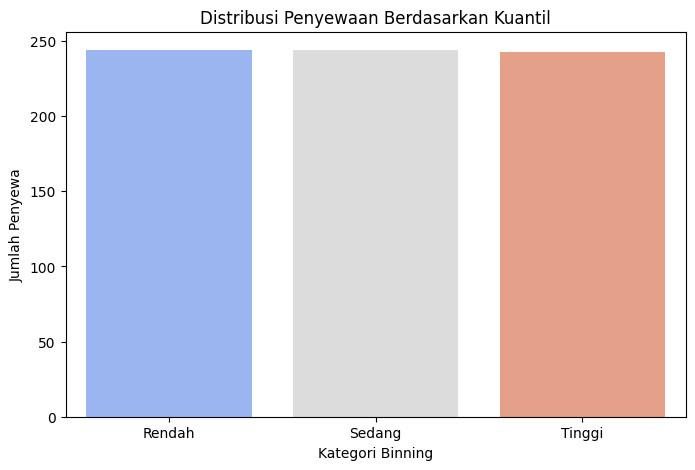

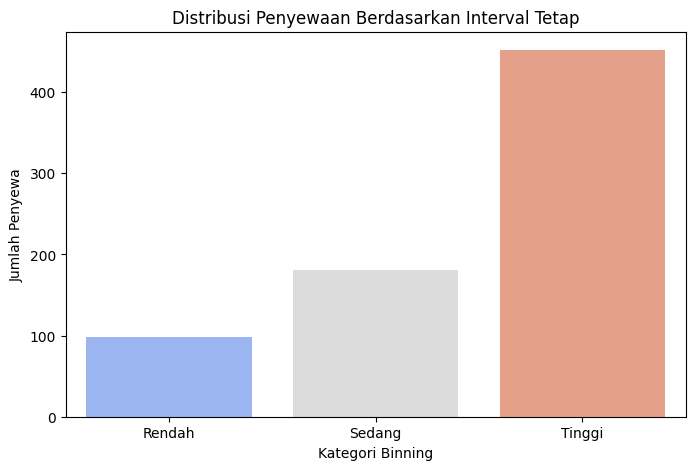

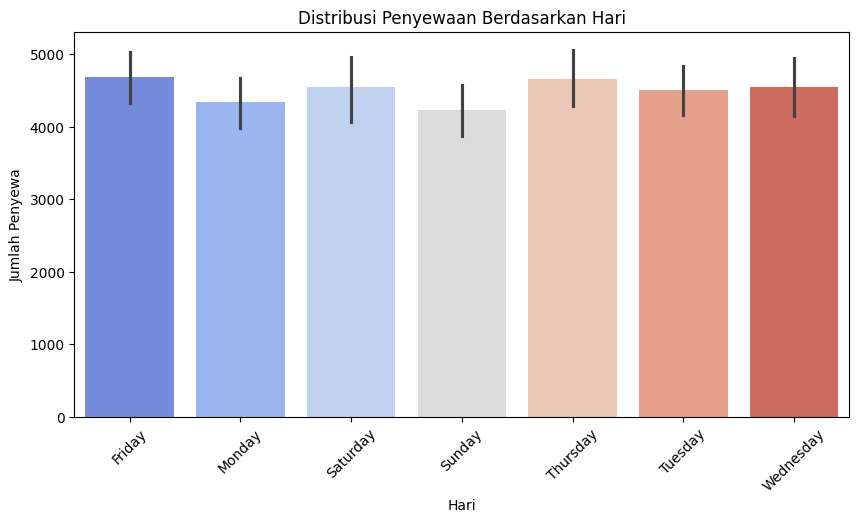

In [33]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
   
days_df['Binning_Kuantil'] = pd.qcut(days_df['cnt'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])
df_binned = days_df[['dteday', 'cnt', 'Binning_Kuantil']]
plt.figure(figsize=(8, 5))
sns.countplot(data=df_binned, x="Binning_Kuantil", hue="Binning_Kuantil", palette="coolwarm", legend=False)
plt.xlabel("Kategori Binning")
plt.ylabel("Jumlah Penyewa")
plt.title("Distribusi Penyewaan Berdasarkan Kuantil")

max_cnt = days_df['cnt'].max()
        # Pastikan bins bertambah secara monotonis
if max_cnt <= 4000:
    # Hilangkan batas 4000 jika max_cnt terlalu kecil
    bins = [0, 2000, max_cnt]
    labels = ['Rendah', 'Sedang']
else:
    bins = [0, 2000, 4000, max_cnt]
    labels = ['Rendah', 'Sedang', 'Tinggi']

days_df['Binning_Tetap'] = pd.cut(days_df['cnt'], bins=bins, labels=labels, include_lowest=True)
df_binned = days_df[['dteday', 'cnt', 'Binning_Tetap']]

plt.figure(figsize=(8, 5))
sns.countplot(data=df_binned, x="Binning_Tetap", hue="Binning_Tetap", palette="coolwarm", legend=False)
plt.xlabel("Kategori Binning")
plt.ylabel("Jumlah Penyewa")
plt.title("Distribusi Penyewaan Berdasarkan Interval Tetap")
        
#days_df['weekday'] = days_df['dteday'].dt.day_name()
weekday_pattern = days_df.groupby("weekday", as_index=False)['cnt'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(data=days_df, x="weekday", y="cnt", hue="weekday", palette="coolwarm", legend=False)
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewa")
plt.title("Distribusi Penyewaan Berdasarkan Hari")
plt.xticks(rotation=45)

**Insight:**
1. Distribusi Penyewaan Berdasarkan Kuantil
   - Penyewaan sepeda relatif stabil sepanjang minggu dengan sedikit variasi.
   - Hari kerja dari Senin hingga Jumat cenderung memiliki jumlah penyewaan yang lebih tinggi daripada hari libur. Namun, perbedaan antara hari Sabtu dan Minggu tidak terlalu besar.
2. Distribusi Penyewaan Berdasarkan Interval Tetap
   - Jumlah penyewaan harian sebagian besar berada dalam kategori "Tinggi", yang berarti lebih dari 4000.
   - Ada sedikit hari dengan penyewaan rendah, yang berarti antara 2000 dan 4000, dan distribusi ini menunjukkan bahwa jumlah penyewaan biasanya cukup tinggi.
3. Distribusi Penyewaan Berdasarkan Hari
   - Metode kuantil membagi data secara seimbang, penyewaan dibagi secara merata ke dalam tiga kategori: Rendah, Sedang, dan Tinggi.
   - Tidak ada dominasi dari satu kategori karena jumlah data dalam setiap kategori hampir sama secara otomatis.

## Conclusion

### Conclution pertanyaan 1 : siapakah yang lebih sering menggunakan layanan?
Yang sering menggunakan layanan adalah registered users dan lebih dominan dibandingkan casual users. Jumlah registered users mencapai 2.672.662 pengguna sedangkan jumlah casual users mencapai 620.017 pengguna, yang bisa empat kali lipatnya dari registered users.

### Conclution pertanyaan 2 : bagaimana pola peminjaman sepeda berdasarkan musim dan cuaca?
- Pola penyewaan sepeda berdasarkan musim, diawali dari spring season yang berjumlah 471.348 (gabungan registered dan casual users). Pada summer season mengalami kenaikan dengan total peminjam sebanyak 918.589. Puncaknya jumlah peminjam sepeda terbanyak pada fall season dengan jumlah 1.061.129. Kemudian pada winter season, penyewa mengalami penurunan penyewa sepeda dengan jumlah penyewa menjadi 841.613.
- Pola penyewaan sepeda berdasarkan cuaca, clear weather menampilkan penggunaan sepeda yang paling banyak dengan jumlah 2.257.952, diikuti misty/cloudy weather dengan jumlah 996.858, dan yang paling sedikit penyewa sepeda terjadi saat Light Rain/Snow weather dengan jumlah 37.869.

### Conclution pertanyaan 3 : bagaimana jumlah peminjaman sepeda per bulan?
Jumlah peminjaman sepeda dalam dua tahun terakhir mengalami peningkatan dari tahun ke tahun. Dari tahun 2011 penyewa sepeda berjumlah 1.243.103, di tahun 2012 jumlah penyewa sepeda berjumlah 2.049.576, diketahui mengalami peningkatan sekitar 1,6 kali dari tahun sebelumnya. Peningkatan penyewaan sepeda terjadi pada pertengahan tahun, yang dimulai dari bulan Mei hingga puncaknya pada bulan September, kemudian mengalami penurunan pada bulan Oktober hingga akhir tahun.

### Conclution pertanyaan 4 : bagaimana perbandingan antara hari libur dan hari biasa terhadap jumlah penyewaan sepeda?
Jumlah penyewaan sepeda tertinggi pada saat working day sebanyak 2.292.410. Hal tersebut menunjukkan orang lebih sering menyewa sepeda untuk aktivitas harian seperti bekerja, sekolah, kuliah, atau kegiatan lainnya. Pada hari libur jumlah penyewa sepeda sebanyak 1.000.269, jika hari libur memiliki penyewaan lebih tinggi berarti orang menyewa sepeda untuk rekreasi.

### Conclution Binning : 
- Pola harian: Jumlah penyewaan sepeda cenderung stabil sepanjang minggu, tapi sedikit lebih rendah di akhir pekan.
- Sebaran penyewaan: Sebagian besar hari memiliki jumlah penyewaan yang tinggi, hanya sedikit hari dengan penyewaan rendah atau sedang.
- Perbedaan metode binning:
  - Interval tetap menunjukkan bahwa kebanyakan hari punya penyewaan tinggi.
  - Kuantil membagi data secara merata ke dalam tiga kategori, jadi terlihat lebih seimbang.
Secara keseluruhan, penyewaan sepeda cukup konsisten, dengan sebagian besar hari memiliki jumlah penyewaan yang tinggi.